In [105]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import random
from pprint import pprint
import plotly.express as px # type: ignore
from tabulate import tabulate # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore
from sklearn.metrics import accuracy_score # type: ignore

### Load and preparation of the data

In [106]:
path = "C:/Users/adepa/OneDrive/Desktop/MushroomDataset/secondary_data.csv"

df = pd.read_csv(path, sep = ';')

df = df.rename(columns={"class": "label"})
temp_cols = df.columns.tolist()
new_cols = temp_cols[1:] + temp_cols[0:1]
df = df[new_cols]

df.head()

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width  ...  \
0               e          NaN          w        16.95       17.09  ...   
1               e          NaN          w        17.99       18.19  ...   
2               e          NaN          w        17.80       17.74  ...   
3               e          NaN          w        15.77       15.98  ...   
4               e          NaN          w        16.53       17.20  ...   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y          w         u          w        t         g   
1            y          w         u          w        t         g   
2            y          w         u          w        t         g   
3            y          w         u          w        t         p   
4            y          w         u          w        t         p   

  spore-print-color habitat season label  
0               NaN       d      w     p  
1               NaN       d      u     p  
2               NaN       d      w     p  
3               NaN       d      w     p  
4               NaN       d      w     p  

[5 rows x 21 columns]

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

In [108]:
na_counts = df.isnull().sum()

table = [[col, na_counts[col]] for col in na_counts.index]
col_names = ["Features", "NA"]

print(tabulate(table, headers=col_names))

Features                 NA
--------------------  -----
cap-diameter              0
cap-shape                 0
cap-surface           14120
cap-color                 0
does-bruise-or-bleed      0
gill-attachment        9884
gill-spacing          25063
gill-color                0
stem-height               0
stem-width                0
stem-root             51538
stem-surface          38124
stem-color                0
veil-type             57892
veil-color            53656
has-ring                  0
ring-type              2471
spore-print-color     54715
habitat                   0
season                    0
label                     0


In [109]:
df = df.drop(['gill-spacing','stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], axis = 1)

In [110]:
df['cap-shape'] = df['cap-shape'].map({'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 's':'sunken', 'p':'spherical', 'o':'others'})
df['cap-surface'] = df['cap-surface'].map({'i':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth', 'h':'shiny', 'l':'leathery', 'k':'silky', 't':'sticky', 'w':'wrinkled', 'e':'fleshy', 'd': 'dry'})
df['cap-color'] = df['cap-color'].map({'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'o':'orange', 'k':'black'})
df['does-bruise-or-bleed'] = df['does-bruise-or-bleed'].map({'t':'bruises-bleedin', 'f':'not-bruises-bleedin'})
df['gill-attachment'] = df['gill-attachment'].map({'a':'bell', 'x':'conical', 'd':'convex', 'e':'flat', 's':'sunken', 'p':'spherical', 'f':'none', '?':'none'})
df['gill-color'] = df['gill-color'].map({'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'o':'orange', 'k':'black', 'f':'none'})
df['stem-color'] = df['stem-color'].map({'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'o':'orange', 'k':'black', 'f':'none'})
df['has-ring'] = df['has-ring'].map({'t':'ring', 'f':'none'})
df['ring-type'] = df['ring-type'].map({'c':'cobwebby', 'e':'evanescent', 'r':'flaring', 'g':'grooved', 'l':'large', 'p':'pendant', 's':'sheathing', 'z':'zone', 'y':'scaly', 'm':'movable', 'f':'none', '?':'none'})
df['habitat'] = df['habitat'].map({'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'h':'heaths', 'u':'urban', 'w':'waste', 'd':'woods'})
df['season'] = df['season'].map({'s':'spring', 'u':'summer', 'a':'autumn', 'w':'winter'})



In [111]:
df.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                2471
habitat                     0
season                      0
label                       0
dtype: int64

In [112]:
df = df.dropna(how = 'any')

In [113]:
df.isnull().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
label                   0
dtype: int64

In [114]:
len(df)

37065

In [115]:
dis = px.pie(df, names='label', color='label', color_discrete_sequence=['#008066','#B2D966'], title='Data Distribution')

dis.update_traces(textfont_size=18)  
dis.update_layout(width=700, height=500, plot_bgcolor='white', paper_bgcolor='white',
                  legend=dict(x=0.8, y=1, traceorder='normal', orientation='v', title_font=dict(size=16), font=dict(size=16))
)

dis.show()

In [116]:
class_counts = df['label'].value_counts()

print(class_counts)

label
p    20121
e    16944
Name: count, dtype: int64


In [117]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 37065 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          37065 non-null  float64
 1   cap-shape             37065 non-null  object 
 2   cap-surface           37065 non-null  object 
 3   cap-color             37065 non-null  object 
 4   does-bruise-or-bleed  37065 non-null  object 
 5   gill-attachment       37065 non-null  object 
 6   gill-color            37065 non-null  object 
 7   stem-height           37065 non-null  float64
 8   stem-width            37065 non-null  float64
 9   stem-color            37065 non-null  object 
 10  has-ring              37065 non-null  object 
 11  ring-type             37065 non-null  object 
 12  habitat               37065 non-null  object 
 13  season                37065 non-null  object 
 14  label                 37065 non-null  object 
dtypes: float64(3), object(12

In [118]:
for column in df.select_dtypes(include=np.number).columns:
    
    fig = px.box(data_frame=df, x='label', color='label', y=column, color_discrete_sequence=['#B2D966', '#008066'], orientation='v')
    fig.update_layout(
        width=600,   
        height=400,  
        plot_bgcolor='white', 
        paper_bgcolor='white',
        title=f'Box plot of {column}', 
        xaxis_title='Label',
        yaxis_title=column,
        showlegend=False
    )
    fig.show()

In [119]:
cormat = df.select_dtypes(include=np.number).corr()
round(cormat,2)

cap-diameter  stem-height  stem-width
cap-diameter          1.00         0.41        0.69
stem-height           0.41         1.00        0.51
stem-width            0.69         0.51        1.00

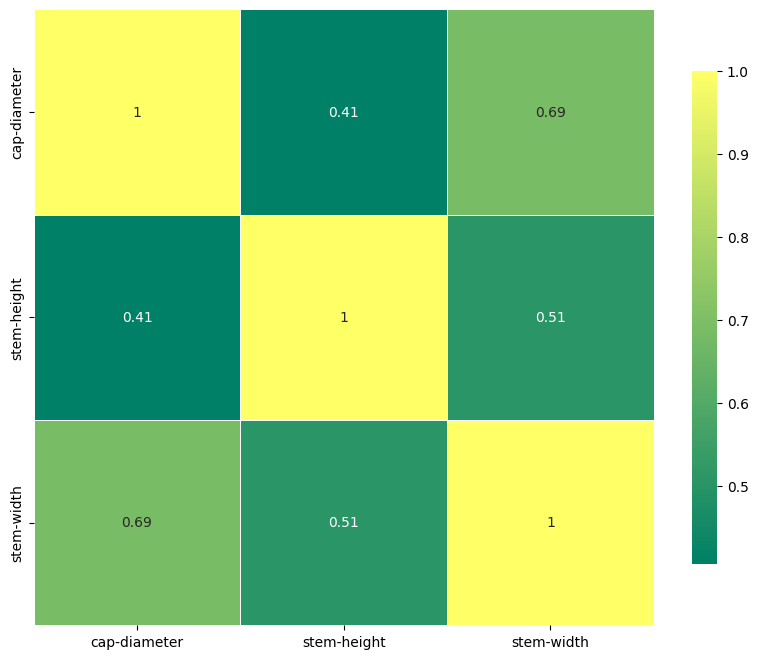

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(cormat, annot=True, cmap='summer', cbar_kws={'shrink': .8}, linewidths=0.5)
plt.show()

In [121]:
sns.pairplot(data=df, hue = 'label', palette=['#B2D966', '#008066'])

In [ ]:
target_column = 'label' 

for column in df.drop(columns=[target_column]).select_dtypes(exclude=[np.number]).columns:

    crosstab = pd.crosstab(df[column], df[target_column]).reset_index() # create a contingency table to get the count of each category based on the target

    crosstab['total'] = crosstab['e'] + crosstab['p'] # add a column for the total frequencies of each category
    crosstab = crosstab.sort_values(by='total', ascending=False)

    # melt the DataFrame to long format for easier plotting
    crosstab_melted = crosstab.melt(id_vars=[column], value_vars=['e', 'p'], 
                                    var_name=target_column, value_name='Count')
    fig = px.bar(crosstab_melted, 
                 x=column, 
                 y='Count', 
                 color=target_column,
                 labels={column: column, 'Count': 'Count', target_column: 'Type'},
                 title=f'Frequencies of Edible and Poisonous Fungi for {column}',
                 color_discrete_map={'e': '#008066', 'p': '#B2D966'})

    fig.update_layout(
        width=550,
        height=450,
        plot_bgcolor='white',
        paper_bgcolor='white',
        barmode='stack',  
        xaxis_title=column,
        yaxis_title='Count',
        legend=dict(
            x=0.9,  
            y=0.9,     
            title='Type',
            traceorder='normal',
            orientation='v'
        )
    )

    fig.update_xaxes(categoryorder='total descending')

    fig.show()


In [ ]:
df['cap-diameter'] = round(df['cap-diameter'], 3)
df['stem-width'] = round(df['stem-width'], 3)
df['stem-height'] = round(df['stem-height'], 3)

In [ ]:
df['cap-diameter'] = pd.to_numeric(df['cap-diameter'], errors='coerce')
df['stem-width'] = pd.to_numeric(df['stem-width'], errors='coerce')
df['stem-height'] = pd.to_numeric(df['stem-height'], errors='coerce')


In [ ]:
print(df.dtypes)

### Train and test split

In [ ]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float): # if the test size is a number or if is a proportion(float)
        test_size = round(test_size * len(df)) # we have to compute the number of rows this proportion represents

    indices = df.index.tolist()
    test_indices = random.sample(population = indices, k = test_size) # we want to pick at random a certain number of these indices from this list

    test_df = df.loc[test_indices] # we create the test daframe by just indexing our input dataframe
    train_df = df.drop(test_indices)
    
    return train_df, test_df

In [ ]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size = 0.20)

In [ ]:
data = train_df.values # we transfrom from a pandas df to a numpy 2d array to make everything faster

In [ ]:
len(data)

In [ ]:
len(test_df)

### Type of feature

In [ ]:
for column in df.columns:
    print(column, '-', len(df[column].unique()))

In [ ]:
def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0] # we initially pick the first value

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

In [ ]:
FEATURE_TYPES = determine_type_of_feature(df)

In [ ]:
FEATURE_TYPES

### Is the a leaf node pure ?

In [ ]:
# this function is used to see if a certain partion of our data contains just one class(so is pure) or not  
# this function will return a boolean, so True if is pure and False if it is not
# remember that when the data will be unique, so it will be pure, it can be classified directly

def check_purity(data):        
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column) # how many distinct classes are in this array ? we use the numpy function 'unique'

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [ ]:
label_column = data[:, -1]
unique_classes = np.unique(label_column) 

unique_classes

In [ ]:
check_purity(data) 

In [ ]:
check_purity(train_df[train_df.label == 'e'].values) 

In [ ]:
check_purity(train_df[train_df['cap-diameter'] > 18].values)

### Classification

In [ ]:
# so in this case we want to classify if a data is poisoned or not
# we calssify on the base of the majority class that appears 

def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts = True) # which class appears most often ?

    index = counts_unique_classes.argmax() # we need to know the index of the largest value of the 'counts_unique_classes' array to see which is the class that appears most often
    classification = unique_classes[index]
    
    return classification

In [ ]:
label_column = data[:, -1]
unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

In [ ]:
unique_classes, counts_unique_classes # in this case we can see that the p class is the one that appears most

In [ ]:
index = counts_unique_classes.argmax() 
classification = unique_classes[index]

In [ ]:
index

In [ ]:
classification # so p is the label that appears most often, and it is indexed 1, so it is in position 1 in the 'counts_unique_classes' array

In [ ]:
classify_data(train_df[train_df['cap-diameter'] < 10].values) # so considering 'cap-diameter' lower than 10 the p category is the one that appear most 

### Potential split

In [ ]:
def get_potential_splits(data): # data which is a 2d numpy array
    
    potential_splits = {} # dictionary, that has as keys the indeces of the columns and as values the list that contains all the potential splits
    _, n_columns = data.shape # tuple that return the number of rows and the number of columns that we have in the dataframe, we only take the number of columns
    for column_index in range(n_columns - 1): # excluding the last column which is the label
        values = data[:, column_index] # values from a particualar variable(feature) or column
        unique_values = np.unique(values) # unique values for that variable
        
        potential_splits[column_index] = unique_values # for every columns we are going to create an entry in our potential split dictionary, so we are going to append our potential split
    
    return potential_splits

In [ ]:
data.shape

In [ ]:
get_potential_splits(data) # the keys are the indecis of the columns and the values are the rows that contain numbers for the potential split, that are the unique values for every columns

In [ ]:
potential_split = get_potential_splits(data)

sns.lmplot(data = train_df, x = 'cap-diameter', y = 'stem-width', hue = 'label', fit_reg = False)

# plt.vlines(x = potential_split[0], ymin = 0, ymax = 100)
# plt.hlines(y = potential_split[8], xmin = 0, xmax = 60)

In [ ]:
sns.lmplot(data = train_df, x = 'cap-diameter', y = 'stem-height', hue = 'label', fit_reg = False)

# plt.vlines(x = potential_split[0], ymin = 0, ymax = 100)
# plt.hlines(y = potential_split[8], xmin = 0, xmax = 60)

In [ ]:
sns.lmplot(data = train_df, x = 'cap-diameter', y = 'stem-width', hue = 'label', fit_reg = False)

# plt.vlines(x = potential_split[0], ymin = 0, ymax = 100)
# plt.hlines(y = potential_split[8], xmin = 0, xmax = 60)

### Split data

In [ ]:
# 2 parameters regarding at which feature we are going to make the split and the second one is about the value at which we are going to make the split

def split_data(data, split_column, split_value): 
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value] # data below the split value
        data_above = data[split_column_values >  split_value] # data above the split value
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

In [ ]:
# example continuos variable

split_column = 0
split_value = 5

split_column_values = data[:, split_column]

split_column_values <= split_value

In [ ]:
# example categorical variables 

split_column = 1
split_value == 'b'

split_column_values = data[:, split_column]

split_column_values == split_value

### Scaled entropy

In [ ]:
# this function should look at all the potential split and then determine the one split that result in the lowest overall entropy

def calculate_entropy(data): 
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts = True)

    probabilities = counts / counts.sum()
    entropy = sum((- probabilities/2) * np.log2(probabilities + 1e-10) - (1 - probabilities)/2 * np.log2(1 + 1e-10 - probabilities))
     
    return entropy

In [ ]:
_, counts = np.unique(label_column, return_counts=True)
print(counts)

In [ ]:
counts.sum()

In [ ]:
probabilities = counts / counts.sum()

probabilities

In [ ]:
calculate_entropy(data) # near to one, so there is a high confunsion between the data

In [ ]:
calculate_entropy(test_df.values)

In [ ]:
def calculate_overall_entropy(data_below, data_above): # we will compute the entropy belonging to the below data and to the above data
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

### Gini function

In [ ]:
def calculate_gini(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    gini = sum(2*probabilities * (1 - probabilities))
     
    return gini

In [ ]:
calculate_gini(data)

In [ ]:
def calculate_overall_gini(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_gini =  (p_data_below * calculate_gini(data_below) 
                    + p_data_above * calculate_gini(data_above))
    
    return overall_gini

### Third splitting criteria

In [ ]:
def calculate_split_3(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    split_3 = sum(np.sqrt(probabilities * (1 - probabilities)))

    return split_3

In [ ]:
calculate_split_3(data)

In [ ]:
def calculate_overall_split_3(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_split_3 = (p_data_below * calculate_split_3(data_below) 
                      + p_data_above * calculate_split_3(data_above))
    
    return overall_split_3

### Determine best split according to the entropy

In [ ]:
# we would like to look at all the potential split and determine the one split that result in the lowest overall entropy 

def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits: # so this will loop over the keys that are the column indices
        for value in potential_splits[column_index]: # this will loop over all the elements of the dictionary
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy: # is the current overall entropy smaller or equal than the initial overall entropy ? it can be equal because there could be more split that gives back the same cut in the entropy
                overall_entropy = current_overall_entropy # if yes we are going to update the overall entropy and we are going to save this values in the 'best_split_column' and 'best_split_value' values
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

### Determine best split according to the gini function

In [ ]:
def determine_best_split_gini(data, potential_splits):
    
    overall_gini = 9999
    for column_index in potential_splits: 
        for value in potential_splits[column_index]: 
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_gini = calculate_overall_gini(data_below, data_above)

            if current_overall_gini <= overall_gini:
                overall_gini = current_overall_gini 
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

### Determine best split according to the third split method

In [ ]:
def determine_best_split_3(data, potential_splits):
    
    overall_3 = 9999
    for column_index in potential_splits: 
        for value in potential_splits[column_index]: 
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_3 = calculate_overall_split_3(data_below, data_above)

            if current_overall_3 <= overall_3:
                overall_3 = current_overall_3 
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [ ]:
def split_method(data, potential_splits, criterion='gini'):
    if criterion == 'scaled_entropy':
        return determine_best_split(data, potential_splits)
    elif criterion == 'gini':
        return determine_best_split_gini(data, potential_splits)
    elif criterion == 'third_method':
        return determine_best_split_3(data, potential_splits)

### Decision Tree Algorithm

In [ ]:
def decision_tree_algorithm(df, counter = 0, min_samples = 200, max_depth = 5, criterion = 'scaled_entropy'):
    
    # data preparations
    if counter == 0: # so in the first call of the function we give a general information about the data since all the helper function works for a 2d numpy array 
        global COLUMN_HEADERS, FEATURE_TYPES # we specify these variables as globals
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases, where the stopping conditions are presented
    # check_purity gives back a boolean array that can be directly be classifies
    # also we classify a data if there are not 'min_samples' datapoints, even though it could not be pure yet
    # so if in a particular node the number of samples becomes less than the minimum samples then we will not split that node any further and it will be a leaf node
    # if the depth of the tree reach the maximum depth we will not split the nodes further
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth): 
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = split_method(data, potential_splits, criterion=criterion)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []} # in that empty list we want to append the yes or no answer 
        
        # find answers (recursion), so we have to re run the algotith in order to get to the classify function 
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth, criterion)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth, criterion)
        
        # If the answers are the same, then there is no point in asking the question.
        # This could happen when the data is classified even though it is not pure yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree

### Evaluation functions

In [ ]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ") # for example feature name is 'stem-width', comparison operator is '<=' and value is '8.85'

    # ask question
    
    # feature is continuous
    if comparison_operator == "<=":  
        if example[feature_name] <= float(value):
            answer = tree[question][0] # yes answer
        else:
            answer = tree[question][1] # no answer
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case, so when our answer is not a dictionary, so is not a 'p' or a 'e' but a residual part of the tree
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [ ]:
def calculate_accuracy(df, tree):
    
    # The syntax args in function definitions is used to pass a variable number of arguments to a function
    df["classification"] = df.apply(classify_example, args = (tree,), axis = 1) # this variable will contain the classfification of our examples
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [ ]:
def zero_one_loss(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    incorrect_predictions = np.sum(y_true != y_pred)
    
    loss = incorrect_predictions / len(y_true)
    
    return loss

### Tree output

In [ ]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size = 0.2)

tree = decision_tree_algorithm(train_df, min_samples = 500, max_depth = 5, criterion='scaled_entropy')
pprint(tree)

### Classification of examples

In [ ]:
example = test_df.iloc[0]
example

In [ ]:
list(tree.keys())[0]

In [ ]:
example['stem-width']

In [ ]:
example['stem-width'] <= 8.85

In [ ]:
question = list(tree.keys())[0]
tree[question][1] # no answer

In [ ]:
classify_example(example, tree)

In [ ]:
test_df.loc[38308]

In [ ]:
test_df.loc[49293]

### Tree evaluation

In [ ]:
y_pred_train = [classify_example(train_df.loc[i], tree) for i in train_df.index]

y_pred_test = [classify_example(test_df.loc[i], tree) for i in test_df.index]

In [ ]:
y_true_train = train_df['label']

In [ ]:
y_true_test = test_df['label']

In [ ]:
zero_one_loss(y_true_test, y_pred_test)

In [ ]:
zero_one_loss(y_true_train, y_pred_train)

In [ ]:
calculate_accuracy(test_df, tree)

In [ ]:
calculate_accuracy(train_df, tree)

In [ ]:
confusion_matrix(y_true_test, y_pred_test)

In [ ]:
classes = ['edible', 'poisoned']
features = df.columns

sns.heatmap(confusion_matrix(y_true_test, y_pred_test),yticklabels=classes,
            xticklabels=classes,annot=True,cmap='summer', fmt='g')
plt.tight_layout()
plt.show()

In [ ]:
test_df

### Hyperparameter tuning

In [ ]:
grid_search = {"max_depth": [], "min_samples": [], "accuracy_train": [], "accuracy_test": []}

for max_depth in range(3, 7):
    for min_samples in range(500, 3000, 500):

        tree = decision_tree_algorithm(train_df, max_depth=max_depth, min_samples=min_samples, criterion = 'scaled_entropy')

        y_true_train = train_df['label'].values
        y_true_test = test_df['label'].values

        y_pred_train = [classify_example(train_df.loc[i], tree) for i in train_df.index]
        y_pred_test = [classify_example(test_df.loc[i], tree) for i in test_df.index]


        accuracy_train = accuracy_score(y_true_train, y_pred_train)
        accuracy_test = accuracy_score(y_true_test, y_pred_test)

        grid_search["max_depth"].append(max_depth)
        grid_search["min_samples"].append(min_samples)
        grid_search["accuracy_train"].append(accuracy_train)
        grid_search["accuracy_test"].append(accuracy_test)
        
    print(f"Progress: Iteration max_depth={max_depth}/6")

grid_search_df = pd.DataFrame(grid_search)
grid_search_df.sort_values("accuracy_test", ascending=False)


In [ ]:
train_accuracies = []
test_accuracies = []


for max_depth in range(1, 25):
    
    tree = decision_tree_algorithm(train_df, min_samples=500, max_depth=max_depth, criterion = 'scaled_entropy')

    y_true_train = train_df['label'].values

    
    y_true_test = test_df['label'].values

    y_pred_train = [classify_example(train_df.loc[i], tree) for i in train_df.index]
    y_pred_test = [classify_example(test_df.loc[i], tree) for i in test_df.index]


    accuracy_train = accuracy_score(y_true_train, y_pred_train)
    accuracy_test = accuracy_score(y_true_test, y_pred_test)

    train_accuracies.append(accuracy_train)
    test_accuracies.append(accuracy_test)

In [ ]:
plt.figure(figsize = (10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label= "train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc = "upper left")
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size = 15)
plt.ylabel("accuracy", size = 15)
plt.show()

In [ ]:
random.seed(0)

train_df, test_df = train_test_split(df, test_size=0.2)
tree = decision_tree_algorithm(train_df, min_samples = 20, max_depth=5)
accuracy = calculate_accuracy(test_df, tree)

pprint(tree, width = 50)
accuracy